# **USED CARS PRICE PREDICTION PROJECT**

# Background

**Objective:**</br>
This project was initiated with the goal of developing a robust machine learning model capable of accurately predicting the prices of used cars. The model is poised to deliver substantial advantages to both prospective buyers, keen on ascertaining the true value of their desired pre-owned vehicle, and sellers, who seek to establish competitive pricing. It holds the potential to empower both consumers and sellers with the knowledge required to make well-informed choices in the process of buying or selling a pre-owned vehicle, thereby potentially mitigating the inherent uncertainty associated with such transactions.

**Methodology:**</br>
Machine learning models will utilize historical data that includes various features, such as year of manufacture, make, model, kilometers traveled, and other features that influence the price of a used car. By combining this data, the model will learn complex patterns in used car market behavior and produce more accurate price estimates than traditional methods.

# Load and Describe Data

In this project, I'm using a dataset from kaggle.com. Here is the link to the dataset: https://www.kaggle.com/datasets/tunguz/used-car-auction-prices.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings('ignore')

%matplotlib inline

---------

## Load Data

In [2]:
dfraw = pd.read_csv("car_prices.csv", on_bad_lines= 'skip')

In [3]:
dfraw.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
101285,2004,Dodge,Ram Pickup 1500,SLT,Quad Cab,automatic,1d7hu18n44s530596,ut,1.9,138541.0,silver,black,salt lake valley buick gmc,5550,5000,Wed Jan 21 2015 03:30:00 GMT-0800 (PST)
130764,2002,Jeep,Grand Cherokee,Laredo,SUV,automatic,1j4gx48s92c307329,pr,2.2,168588.0,gray,black,select remarketing group llc/anderson financial,1400,800,Thu Jan 15 2015 03:30:00 GMT-0800 (PST)
1185,2012,Honda,Pilot,Touring,SUV,automatic,5fnyf3h97cb043598,ca,4.5,23288.0,white,black,connell chevrolet,28100,26750,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)


Here is the list of features contained in the dataset:

1. `year`: The production date of the car.
2. `make`: The brand or manufacturer of the car.
3. `model`: The model edition of each car brand.
4. `trim`: The trim version of the car.
5. `body`: The body type of the car.
6. `transmission`: The type of transmission used in the car.
7. `VIN`: Vehicle Identification Number.
8. `state`: The state where the car was sold.
9. `condition`: The condition of the car at the time of sale.
10. `odometer`: The mileage of the car.
11. `color`: The exterior color of the car.
12. `interior`: The interior color of the car.
13. `seller`: The seller of the car (Car dealers).
14. `MMR`: Manheim Market Record, a pricing tool and database used in the automotive industry, primarily by car dealers and professionals involved in buying and selling used vehicles.
15. `sellingprice`: The selling price of the car.
16. `saledate`: The date when the car was sold.

## Data Preview

### Info

In [4]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Some key points that can be inferred are:

1. There are total of 558811 entries.
2. Some features contain null values.
3. All features's datatype is look correct except for `saledate`.

In [5]:
# Changing data type of saledate from object to datetime
timeget = []
for i in dfraw['saledate'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)
dfraw['saledate'] =  pd.to_datetime(timeget)

### Checking for Null Values

In [6]:
dfraw.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

There are quite a few null values contained in the dataset. These will be addressed during the data cleaning process.

### Checking for Duplicated Data

In [7]:
dfraw.duplicated().sum()

0

Luckily, there is no single duplicated row.

### Describing Dataset

Before further analysis, I would like to change the values in categorical features to lowercase for consistency purposes.

In [8]:
# Categorizing features based on numerical or categorical data type
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller']

In [9]:
# Changing the values of categorical features to lower case
for col in cat:
    dfraw[col] = dfraw[col].str.lower()
    dfraw[col] = dfraw[col].str.lower().str.strip()

In [10]:
# Describing numerical features
dfraw[num].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


Some key points that can be inferred from the statistical data above are:

`year`:
- Average production year is around 2010.
- Most cars fall within the 2007-2013 range.

`condition`:
- Average condition score is approximately 3.425.
- Condition scores are evenly distributed between 2.7 and 4.2.

`odometer`:
- Average mileage is around 68,323 miles.
- 25th percentile: Below 28,374 miles, 75th percentile: Above 99,112 miles.
- As for the minimum value for odometer is 1 mile, and I think this doesn't make sense because it means that some used car being sold just after it bought.

`MMR` (Manheim Market Record):
- MMR values range from 25 to 182,000.
- Average MMR value is approximately 13,769.325.
- 25th percentile: 7,100, 75th percentile: 18,300.

`sellingprice`:
- Average selling price is around 13,611.262.
- 25th percentile: 6,900, 75th percentile: 18,200.
- Some vehicles have notably high selling prices.
- Sellingprice also contains abonormals minimum values.

In [11]:
# Describing categorical features
dfraw[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811
unique,66,851,1890,45,2,550296,38,20,17,14264
top,ford,altima,base,sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt
freq,93997,19349,55842,241343,475914,5,82945,110970,244325,19693


Except for the `transmission`, the unique values of the categorical features are quite many. Since these features might contain useful information, I am going to encode them in the feature engineering process.

# EDA

In this step, I want to look more closely at the distribution of the data and how the features correlate with one another by using univariate and multivariate analysis.

-------

## **Numerical Features Distribution**

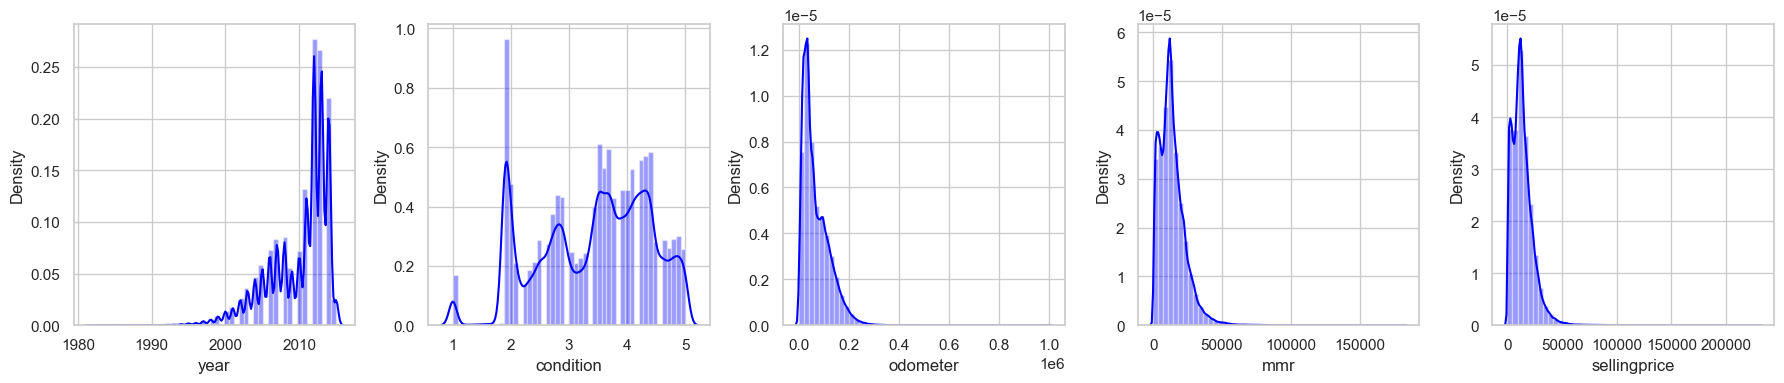

In [207]:
# Plotting numerical features to seetheir distribution
sns.set(style='whitegrid')
plt.figure(figsize= (18, 4))
for i in range(0, len(num)):
    plt.subplot(1, 5, i+1)
    sns.distplot(dfraw[num[i]], color= 'blue')
    plt.tight_layout()

Some key points that can be inferred are:
- `conditon` scores are evenly distributed.
- Newer cars, which are manufactured more recently, tend to sell better. This is because newer cars are often in better condition at the time of sale, and more people prefer functional cars over those in significantly poorer condition, which may only be suitable for parts.
- The distributions of `odometer`, `mmr`, and `selling price` are right-skewed, indicating a wide range of values. Consequently, it is possible that these features contain extreme outliers. However, since the outliers make sense, given the fact that some cars are really expensive, and some have high mileage due to the frequency of usage, they won't be removed.

## Categorical Features Distribution

### `make` & `model`

In [12]:
# Brand grouping
top_brand = dfraw.groupby(['make']).size().sort_values(ascending= False).reset_index(name= 'count')

Text(0.5, 1.0, 'Top 10 Brand')

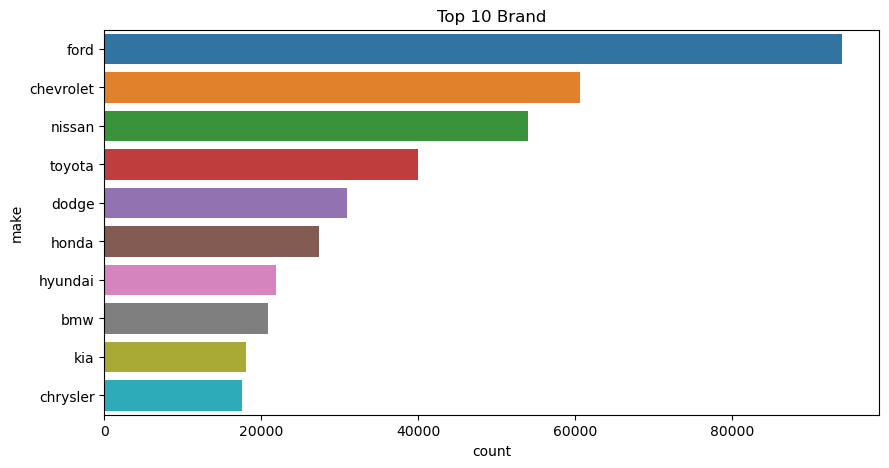

In [13]:
# Visualizing top brands
plt.figure(figsize= (10, 5))
sns.barplot(data= top_brand.head(10), x= 'count', y= 'make')
plt.title("Top 10 Brand")

In [13]:
# Model grouping
top_model = dfraw.groupby(['model']).size().sort_values(ascending= False).reset_index(name= 'count')

Text(0.5, 1.0, 'Top 10 Model')

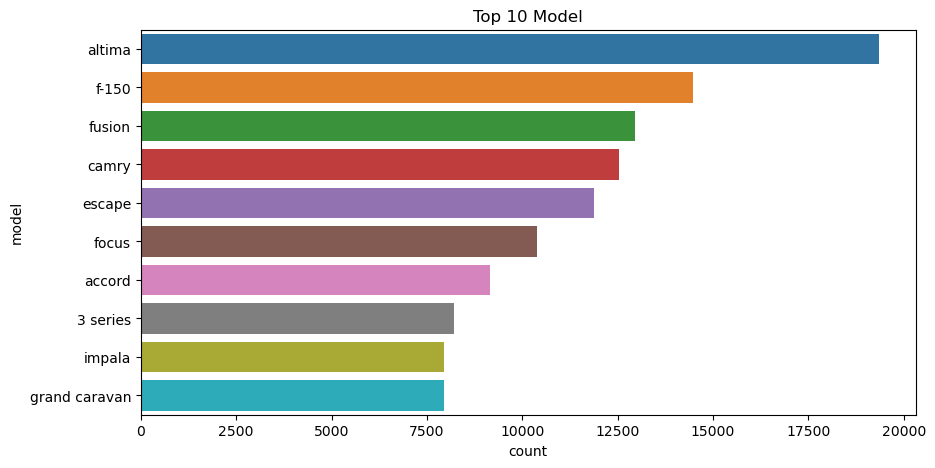

In [15]:
# Visualizing top models
plt.figure(figsize= (10, 5))
sns.barplot(data= top_model.head(10), x= 'count', y= 'model')
plt.title("Top 10 Model")

In [14]:
# Top brand and model grouping
top_brand_model = dfraw.groupby(['make', 'model']).size().sort_values(ascending= False).reset_index(name= 'count')

In [15]:
top_brand_model.head(10)

,make,model,count
0,nissan,altima,19349
1,ford,f-150,14479
2,ford,fusion,12946
3,toyota,camry,12549
4,ford,escape,11893
5,ford,focus,10399
6,honda,accord,9155
7,bmw,3 series,8204
8,chevrolet,impala,7957
9,dodge,grand caravan,7941


Above are the top 10 brands that sold the most. Nissan Altima is the best-selling car, but the Ford brand sold the most overall.

### `color` & `interior`

In [16]:
# Color grouping
ext_color = dfraw.groupby('color').size().sort_values().reset_index(name= 'count')
int_color = dfraw.groupby('interior').size().sort_values().reset_index(name= 'count')

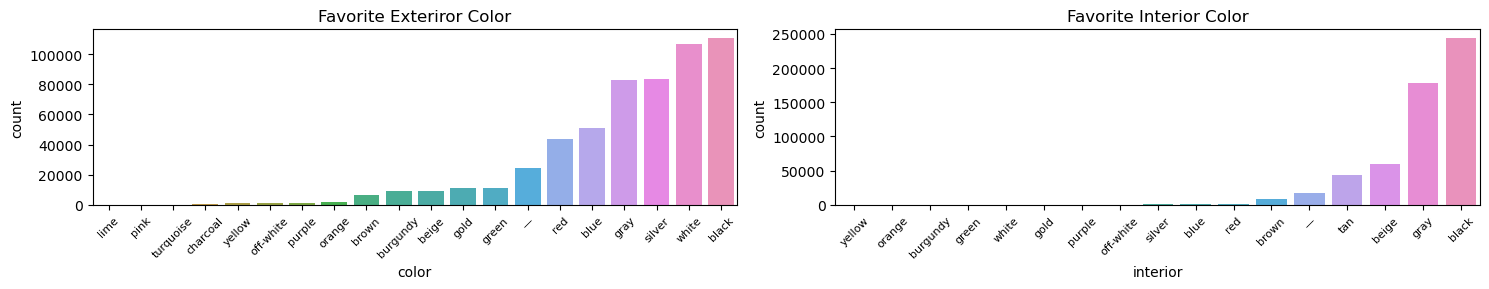

In [19]:
# Visualizing top color
plt.figure(figsize= (15, 3))

plt.subplot(1, 2, 1)
sns.barplot(data= ext_color, x= 'color', y= 'count')
plt.title("Favorite Exteriror Color")
plt.xticks(rotation= 45, size= 8)

plt.subplot(1, 2, 2)
sns.barplot(data= int_color, x= 'interior', y= 'count')
plt.title("Favorite Interior Color")
plt.xticks(rotation= 45, size= 8)

plt.tight_layout()

Some key points that can be inferred are:
- Black is the favorite color for both the `exterior` and `interior`.
- Unlike in exterior color, rather bright colors are not preferred for interior color.
- Both features contain '-' values, which will be addressed in the next step.

## Features Correlation

### `odometer` `condition` & `sellingprice`

<Axes: xlabel='odometer', ylabel='sellingprice'>

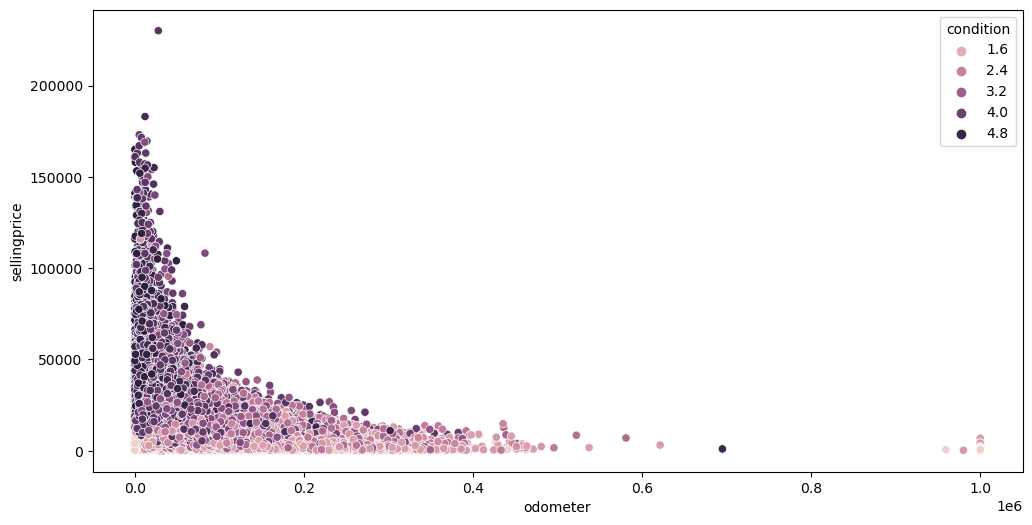

In [23]:
# Visualizing the relation between 'odometer', 'condition' and 'sellingprice'
plt.figure(figsize=(12,6))
sns.scatterplot(data=dfraw, x='odometer', y='sellingprice', hue='condition')

From the graph, it can be inferred that the higher the odometer, the lower the price is. Also, the higher the condition value, the higher the prices are. However, there are also outliers, in which have higher condition value but are sold at lower prices. and also there are some cars with lower condition value but sold at a higher price. This might be due to  the fact that a certain make or model is valued at higher prices despite the condition.

### `saledate` & `sellingprice`

In [12]:
# Creating feature 'month_sold'
dfraw['month_sold'] = pd.to_datetime(dfraw['saledate']).dt.month

In [13]:
# Month sold grouping
month = dfraw.groupby('month_sold').agg({'vin': 'count', 'sellingprice': 'mean'}).reset_index()
month = month.rename(columns={'vin': 'number_sold', 'sellingprice': 'prices'})
month

,month_sold,number_sold,prices
0,1,140815,13291.771416
1,2,163054,13608.196223
2,3,46277,13443.076971
3,4,1450,10206.727586
4,5,52451,14341.296753
5,6,99944,15007.876561
6,7,1300,16976.741538
7,12,53520,11293.613696


Text(0.5, 1.0, 'Number of Cars Sold for Each Month')

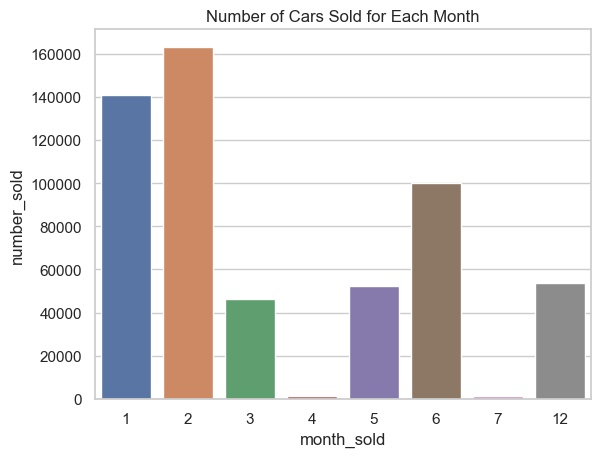

In [214]:
# Visualizing car sales based on month the cars were sold
sns.barplot(month, x= 'month_sold', y= 'number_sold')
plt.title("Number of Cars Sold for Each Month")

The graph illustrates that the highest sales occur in January and February. This can be attributed to the fact that these months coincide with people receiving their annual bonuses,
motivating them to make a car purchase. Furthermore, June also exhibits relatively strong sales compared to other months, although not as high as the initial months.
This can be attributed to June being a period leading up to the summer holidays when people are inclined to buy cars for vacation purposes.

Text(0.5, 1.0, 'Average Car Prices Throughout the Months')

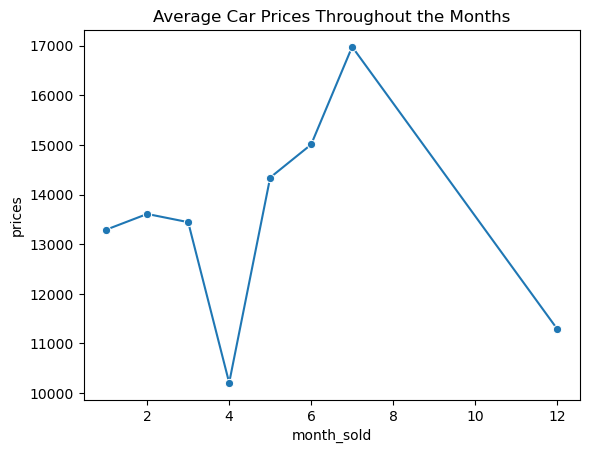

In [27]:
# Visualizing car prices based on the month the car were sold
sns.lineplot(month, x= 'month_sold', y= 'prices', marker= 'o')
plt.title("Average Car Prices Throughout the Months")

It can be seen that even though the highest sales are in January and February, the average selling price is not as high as in June and July. Meanwhile, the average selling price in April was the lowest. This is in accordance with demand which was quite low in April. Meanwhile, there is no data available for sales in months 8 to 11. This is likely due to incomplete data collection.

### `seller` & `sellingprice`

In [14]:
# Creating 'price_diff' feature
dfraw['price_diff'] = dfraw['mmr'] - dfraw['sellingprice']

In [15]:
# Grouping and sorting sellers based on the best value they offer for their cars, considering the difference between MMR and selling price.
seller_price = dfraw.groupby('seller').agg({'vin': 'count', 'price_diff': 'mean'}).reset_index()
seller_price = seller_price.rename(columns={'vin': 'number_sold'})
seller_price.sort_values(['price_diff']).head(10)

,seller,number_sold,price_diff
9994,pdx auto wholesale llc,1,-41500.000000
10645,pure pursuit automotive,1,-18600.000000
1232,auto world sales & service llc,1,-16900.000000
12739,the car store inc,1,-11000.000000
3447,continental auto group,1,-10550.000000
8070,malfara's automotive,1,-10200.000000
8253,master pro motors,1,-10000.000000
8043,maguire & sons auto brokers,1,-9950.000000
8301,mbz 4 less,7,-9810.714286
7546,le bo auto brokers,1,-9500.000000


In [21]:
seller_price.describe()

,number_sold,price_diff
count,14264.000000,14264.000000
mean,39.176318,342.495401
std,417.346083,1622.458804
min,1.000000,-41500.000000
25%,1.000000,-375.000000
50%,3.000000,200.000000
75%,10.000000,866.666667
max,19693.000000,31500.000000


Above are 10 top sellers that offer the best value for their cars (they sell cars below MMR). However, 9 out of the top 10 sellers only sold 1 car. Therefore, I will filter out the seller that sold the number of cars below the average (39 cars).

In [22]:
# Filtering out seller based on the number of cars they sold
seller_price[seller_price['number_sold'] >= 39].sort_values(['price_diff']).head(10)

,seller,number_sold,price_diff
11245,richard j bartlett jr enterprises,49,-2329.081633
9412,nova auto sales inc,39,-2204.487179
2524,california auto wholesale,129,-2177.131783
1256,autocelli inc,146,-2002.739726
3649,crossroad motors llc,107,-1934.579439
9947,pat obrien chevrolet south,56,-1888.392857
6388,hrft finance inc,42,-1877.380952
12115,southeastern auto brokers inc,41,-1737.195122
13819,vw credit xu ready,68,-1715.441176
14054,wholesale enterprise inc,43,-1663.953488


From a business perspective, the data above can be used as a reference for small car dealers as a reference for sellers who provide good prices for resale.

In [24]:
# dfraw.to_csv('dfraw1.csv', index=False)

# DATA CLEANSING

---

In [464]:
# dfclean = pd.read_csv('dfraw1.csv')

In [17]:
dfclean = dfraw.copy()

## Abnormal Values Handling

In the previous EDA stage, there were rows that had extreme and unreasonable values. So, in this data cleaning stage, these rows will be deleted.

In [18]:
# Dropping abnormal 'odometer' values
i_min_odo = dfclean[((dfclean.odometer <= 100))].index
dfclean = dfclean.drop(i_min_odo)

In [19]:
# Dropping abnormal 'sellingprice' values
i_min_price = dfclean[((dfclean.sellingprice == 1))].index
dfclean = dfclean.drop(i_min_price)

In [20]:
dfclean.describe()

,year,condition,odometer,mmr,sellingprice,month_sold,price_diff
count,557076.000000,545385.000000,556983.000000,557076.000000,557076.000000,557076.000000,557076.000000
mean,2010.049932,3.427048,68535.360711,13776.667860,13629.561123,3.801585,147.106738
std,3.954030,0.946993,53343.931088,9670.001047,9734.364803,3.229295,1723.225525
min,1982.000000,1.000000,101.000000,25.000000,100.000000,1.000000,-207200.000000
25%,2007.000000,2.700000,28574.000000,7125.000000,6900.000000,1.000000,-650.000000
50%,2012.000000,3.600000,52461.000000,12250.000000,12100.000000,2.000000,50.000000
75%,2013.000000,4.200000,99270.500000,18300.000000,18200.000000,6.000000,800.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000,12.000000,87750.000000


## Missing Values Handling

Some features contain missing values. At this stage, this problem will be handled in several ways, depending on the percentage of missing values in the total data. The missing values below 1% will be dropped. Otherwise, they will be replaced with mode for categorical features and mean for numerical features.

In [21]:
# Checking the percentage of missing values in features
null_percentage= (dfclean.isnull().sum() / len(dfclean)) * 100
print(null_percentage)

year             0.000000
make             1.836374
model            1.853966
trim             1.898484
body             2.353359
transmission    11.682428
vin              0.000000
state            0.000000
condition        2.098636
odometer         0.016694
color            0.131041
interior         0.131041
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
month_sold       0.000000
price_diff       0.000000
dtype: float64


In [22]:
# Defining some features to be processed
mode_fill = ['make', 'model', 'trim', 'body', 'transmission']
to_drop = ['odometer', 'color', 'interior']

In [23]:
# Filling out null values with mode
for col in mode_fill:
    dfclean[col] = dfclean[col].fillna(dfclean[col].mode().iloc[0])

In [24]:
# Dropping null values
for col in to_drop:
    dfclean = dfclean.dropna(subset=[col])

In [25]:
# Filling out null values with mean
dfclean['condition'] = dfclean['condition'].fillna(dfclean['condition'].mean())

In [26]:
dfclean.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
month_sold      0
price_diff      0
dtype: int64

Before I move on to the next process, remember that `color` and `interior` features contain values that are '—'. Therefore, these values will be replaced with mode.

In [27]:
# Replacing '—' values with mode
dfclean['color'] = dfclean['color'].replace({'—': dfclean['color'].mode().iloc[0]})
dfclean['interior'] = dfclean['color'].replace({'—': dfclean['color'].mode().iloc[0]})

In [28]:
dfclean['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [29]:
dfclean['interior'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [25]:
# dfclean.to_csv('dfclean1.csv', index= False)

# DATA PREPROCESSING

---

In [29]:
# dfprep = pd.read_csv('dfclean1.csv')

In [31]:
dfprep = dfclean.copy()

In [28]:
dfprep.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,month_sold,price_diff
384734,2003,lincoln,aviator,premium,suv,automatic,5lmeu78h03zj36098,ma,2.5,121496.0,black,black,premier cape cod,3225,2700,2015-03-03 01:30:00,3,525
39504,2006,acura,tl,base,sedan,automatic,19uua66206a063436,md,2.1,102575.0,gray,gray,capital one auto finance,8200,8000,2015-02-10 01:30:00,2,200
78228,2013,dodge,dart,sxt,sedan,automatic,1c3cdfba2dd105779,il,2.0,25545.0,black,black,ally,11400,10800,2015-01-15 02:00:00,1,600


## Feature Extraction

### `is_auto`

This feature contains binary information on whether a car has a manual or automatic transmission.

In [36]:
# Converting transmission value into binary
dfprep['is_auto'] = dfprep['transmission'].apply(lambda x: 1 if x == 'automatic' else 0)

### `region`

Grouping state codes into region categories.

In [37]:
dfprep['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'ne', 'nj', 'nv',
       'oh', 'fl', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'mo',
       'ut', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'al', 'nm', 'ns'], dtype=object)

In [38]:
west = ['ca', 'az', 'nv', 'or', 'wa', 'hi', 'ak', 'id', 'mt', 'ut', 'wy', 'co', 'nm']
midwest = ['mn', 'wi', 'ne', 'oh', 'mi', 'in', 'il', 'mo', 'ks', 'ia', 'nd', 'sd']
south = ['tx', 'tn', 'md', 'sc', 'nc', 'fl', 'ga', 'va', 'ms', 'al', 'la', 'ok', 'ar']
northeast = ['pa', 'nj', 'ny', 'ct', 'ma', 'ri', 'nh', 'vt', 'me', 'de', 'dc', 'md']
canada = ['qc', 'ab', 'on', 'ns']

region = []

for code in dfprep['state']:
    if code in west:
        reg = 'west'
    elif code in midwest:
        reg = 'midwest'
    elif code in south:
        reg = 'south'
    elif code in northeast:
        reg = 'northeast'
    elif code in canada:
        reg = 'canada'
    else:
        reg = 'others'
    region.append(reg)
    
dfprep['region'] = region

### `ext_color_group`

Grouping interior color based on the commonality, represented with 1 for common and 0 for uncommon colors.

In [43]:
dfprep.groupby('color').size().sort_values(ascending= False)

color
black        135303
white        106345
silver        83124
gray          82633
blue          50950
red           43413
green         11302
gold          11265
beige          9172
burgundy       8943
brown          6690
orange         2075
purple         1551
off-white      1447
yellow         1278
charcoal        477
turquoise       235
pink             42
lime             15
dtype: int64

In [44]:
common_colors = ['black', 'white', 'silver', 'gray']

dfprep['ext_color_group'] = dfprep['color'].apply(lambda x: 1 if x in common_colors else 0)

### `int_color_group`

Grouping interior color based on the commonality, represented with 1 for common and 0 for uncommon colors.

In [45]:
dfprep.groupby('interior').size().sort_values(ascending= False)

interior
black        135303
white        106345
silver        83124
gray          82633
blue          50950
red           43413
green         11302
gold          11265
beige          9172
burgundy       8943
brown          6690
orange         2075
purple         1551
off-white      1447
yellow         1278
charcoal        477
turquoise       235
pink             42
lime             15
dtype: int64

In [46]:
common_colors = ['black', 'white', 'silver', 'gray']

dfprep['int_color_group'] = dfprep['interior'].apply(lambda x: 1 if x in common_colors else 0)

### `body_type`

Grouping body type into broader categories.

In [47]:
cab = ['crew cab', 'double cab','crewmax cab', 'access cab','king cab','extended cab', 'supercab', 'regular cab','quad cab', 'club cab','xtracab', 'mega cab','regular-cab', 'cab plus 4',  'cab plus']
gtype = ['g coupe', 'g sedan', 'g convertible']
coupe = ['coupe', 'q60 coupe', 'cts-v coupe', 'elantra coupe', 'genesis coupe', 'koup', 'cts coupe', 'g37 coupe']
wagon = ['wagon', 'cts wagon', 'cts-v wagon', 'tsx sport wagon']
suv = ['suv']
van = ['van', 'e-series van', 'promaster cargo van', 'ram van', 'transit van', 'minivan' ]
sedan = ['sedan']
convertible = ['convertible', 'g37 convertible',  'q60 convertible', 'beetle convertible', 'granturismo convertible']
hatchback = ['hatchback']
supercrew = ['supercrew']

body_cat = []

for b in dfprep['body']:
    if b in cab:
        btype = 'cab'
    elif b in gtype:
        btype = 'g-type'
    elif b in coupe:
        btype = 'coupe'
    elif b in wagon:
        btype = 'wagon'
    elif b in suv:
        btype = 'suv'
    elif b in van:
        btype = 'van'
    elif b in sedan:
        btype = 'sedan'
    elif b in convertible:
        btype = 'convertible'
    elif b in hatchback:
        btype = 'hatchback'
    elif b in supercrew:
        btype = 'supercrew'
    else:
        btype = 'others'
    
    body_cat.append(btype)
    
dfprep['body_type'] = body_cat

In [48]:
dfprep.to_csv('dfprep1.csv')

## Feature Encoding

This process aims to convert categorical values into numerical ones.

In [49]:
dfenc = dfprep.copy()

### Target Encoding: `model` `seller`

This encoding method is able to preserve information about the relationships with other features. For the `model` feature, the target will be `mmr` as it is considered a standard car price valuation. For the `seller` feature, the target will be `price_diff`, since I want to preserve the relationship between dealership and the difference between their car selling price and the standard price (MMR).

In [50]:
# encoding 'model'
encoding_map= dfenc.groupby('model')['mmr'].mean().to_dict()
dfenc['model_encoded'] = dfenc['model'].map(encoding_map)

In [51]:
# encoding 'seller'
encoding_map= dfenc.groupby('seller')['price_diff'].mean().to_dict()
dfenc['seller_encoded'] = dfenc['seller'].map(encoding_map)

### Count Encoding: `make` `trim`

Since these 2 features have large numbers of unique categories, count encoding is used. Unlike Count encoding provides information about the relative frequency of each category in the dataset. Also, count encoding reduces the dimensionality of the feature space compared to one-hot encoding.

In [52]:
# Defining categorical features to be encoded
to_encode = ['make', 'trim']

# Performing count encoding for categorical features
for col in to_encode:
    encoding_map = dfenc[col].value_counts()
    dfenc[col + '_encoded'] = dfenc[col].map(encoding_map)

### OH Encoding: `region` `body_type`

This encoding method is used for the previously newly extracted categorical features. One-hot encoding is a way to represent categorical variables as binary vectors. This method is used for these features because they have few unique values.

In [53]:
# Defining categorical features to be encoded
to_encode = ['region', 'body_type']

# Performing oh encoding for categorical features
for col in to_encode:
    dfenc = pd.get_dummies(dfenc, columns=[col], prefix=[col])

In [30]:
# dfenc.to_csv('dfenc1.csv', index= False)

## Feature Selection

In this process, some features will be removed. The features that are deleted are considered irrelevant and are sufficiently represented by other features from the feature extraction results.

In [318]:
# dfsel = pd.read_csv('dfenc1.csv')

In [58]:
dfsel= dfenc.copy()

In [59]:
dfsel.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'month_sold', 'price_diff', 'is_auto',
       'ext_color_group', 'int_color_group', 'model_encoded', 'seller_encoded',
       'make_encoded', 'trim_encoded', 'region_canada', 'region_midwest',
       'region_northeast', 'region_others', 'region_south', 'region_west',
       'body_type_cab', 'body_type_convertible', 'body_type_coupe',
       'body_type_g-type', 'body_type_hatchback', 'body_type_sedan',
       'body_type_supercrew', 'body_type_suv', 'body_type_van',
       'body_type_wagon'],
      dtype='object')

In [60]:
# Dropping irrelevant features
dfsel.drop(['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 
            'seller', 'mmr', 'saledate', 'price_diff'], axis= 1, inplace= True)

In [61]:
dfsel.columns

Index(['year', 'condition', 'odometer', 'sellingprice', 'month_sold',
       'is_auto', 'ext_color_group', 'int_color_group', 'model_encoded',
       'seller_encoded', 'make_encoded', 'trim_encoded', 'region_canada',
       'region_midwest', 'region_northeast', 'region_others', 'region_south',
       'region_west', 'body_type_cab', 'body_type_convertible',
       'body_type_coupe', 'body_type_g-type', 'body_type_hatchback',
       'body_type_sedan', 'body_type_supercrew', 'body_type_suv',
       'body_type_van', 'body_type_wagon'],
      dtype='object')

Now, I'd like to see the correlation between features (target and the features with binary value, will not be included).

In [62]:
# Displaying features correlation
correlation = dfsel[['year', 'condition', 'odometer', 'sellingprice', 'month_sold', 'model_encoded', 'seller_encoded', 'make_encoded', 'trim_encoded']].corr()

Text(0.5, 1.0, 'Features Correlation')

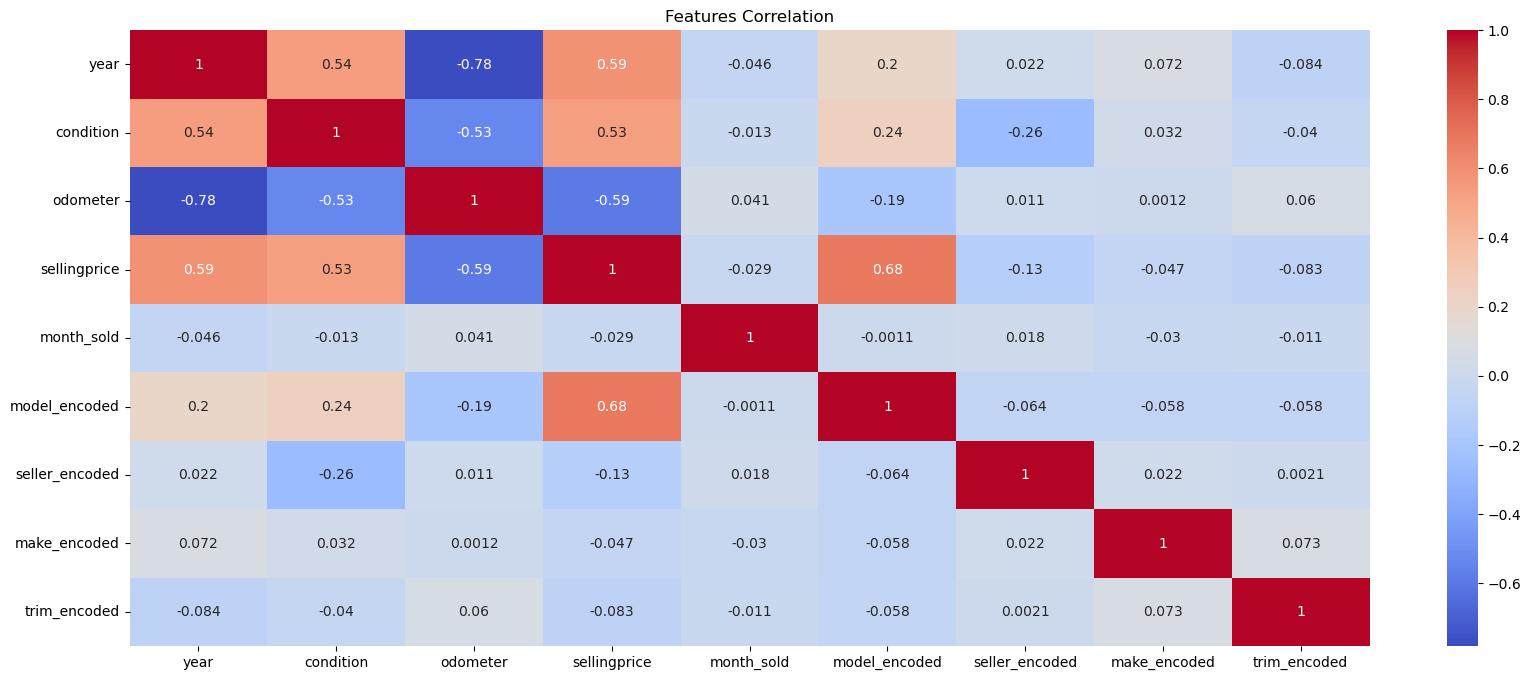

In [63]:
# Visualizing features correlation
plt.figure(figsize= (20, 8))
sns.heatmap(correlation, annot= True, cmap= 'coolwarm')
plt.title('Features Correlation')

In the provided graph, it is evident that the `year` feature shows a high degree of correlation with `odometer`. This correlation raises a statistical concern known as multicollinearity, which occurs when two or more independent variables in regression analysis have a high correlation, leading to unstable regression results and challenges in interpretation. To address this issue, I have decided to drop the `year`.

In [64]:
# Dropping highly correlated independent feature
dfsel.drop(['year'], axis= 1, inplace= True)

In [31]:
# dfsel.to_csv('dfsel1.csv', index= False)

# MODELING

---

In [1]:
dfmodel= pd.read_csv('dfsel1.csv')

NameError: name 'pd' is not defined

In [67]:
dfmodel= dfsel.copy()

## Data Splitting

In [22]:
from sklearn.model_selection import train_test_split

# Defining features and target
X= dfmodel.drop(['sellingprice'] , axis= 1)
y= dfmodel[['sellingprice']]

# Splitting train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

## Feature Scaling

Feature scaling is the process of standardizing the range of independent variables or features in the data. This is important because many machine learning algorithms are sensitive to the scale of the features. The use of RobustScaler is to ensure that the scaling process is less influenced by outliers which can lead to more accurate and reliable results

In [5]:
from sklearn.preprocessing import RobustScaler

# Creating a RobustScaler object
rs = RobustScaler()

# Features to be normalized
feat_scale = dfmodel[['odometer', 'condition', 'month_sold', 'model_encoded', 'seller_encoded', 'make_encoded', 'trim_encoded']].columns

# Fitting the scaler on data
for col in feat_scale:
    scaler = rs.fit(X_train[[col]])
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

## Model Training

XGBoost is the algorithm that will be used in this process. The reason is that XGBoost is a powerful and versatile algorithm that is widely used in machine learning for its ability to deliver excellent predictive performance across various domains and datasets.

In [6]:
from xgboost import XGBRegressor

# Training model
xgb = XGBRegressor(random_state= 0)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

## Model Evaluation

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  
  # Calculating RMSE
  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  # Calculating r2
  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

In [11]:
eval_regression(xgb)

RMSE (test): 2811.9791113614147
RMSE (train): 2664.3888097645254
r2 (test): 0.9161185051677917
r2 (train): 0.9247246128563876


In [10]:
# k-fold cross validation

scores = cross_validate(xgb, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rmse_scores = np.sqrt(-scores['test_score'])

print('RMSE (cross-val test): ' + str(rmse_scores.mean()))
print('RMSE (cross-val train): ' + str(np.sqrt(-scores['train_score']).mean()))

RMSE (cross-val test): 2865.7794092426743
RMSE (cross-val train): 2679.50025012159


### Interpreting Result

**RMSE (test): 2811**</br>
The RMSE of approximately 2811 means that, on average, the model's predictions are off by about 2811 units. Given that the target variable has a range from 1 to 230000, an RMSE of 2811 is relatively small compared to the range of the target variable. This suggests that the model is making accurate predictions. 

**r2 (test): 0.916**</br>
The R-squared value of 0.916 indicates that the model explains approximately 91.6% of the variance in the test data. Given that the target variable has a wide range, this is a good level of explanation.

**Cross-validation scores: 2865**</br>
The scores suggest that the model's performance is relatively consistent across different folds of the data. Both the training and test cross-validation RMSE values are in line with the original RMSE values for the training and test sets. This indicates that the model is likely to generalize well to new, unseen data.

**Train-Test scores difference:**</br>
A small gap or difference between the performance metrics (RMSE and r2) on the training and test sets indicates that the model is likely not overfitting and has a good chance of performing well on new, unseen data. This is because the model is showing consistent performance on both the data it was trained on and data it hasn't seen before.

## Hyperparameter Tuning

Even though the model performed well initially, I want to see if I can improve it further by tweaking some parameters. I'm using Bayesian optimization for this because it's more efficient than other methods like grid search or random search. It's like a smart way to explore different options and find the best ones without trying every single combination. This way, I hope to fine-tune the model for even better results!

In [72]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [77]:
import optuna

def objective(trial):
    
    # Defining the hyperparameter search space
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.1),
                   'n_estimators': trial.suggest_int('n_estimators', 100, 200),
                   'max_depth': trial.suggest_int('max_depth', 3, 4),
                   'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
                   'subsample': trial.suggest_float('subsample', 0.8, 0.9),
                   'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 0.9),
                   'gamma': trial.suggest_float('gamma', 0, 0.1),
                   'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.1),
                   'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.1)
                  }

    # Creating and training the XGBoost model
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculating RMSE as the objective to minimize
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)

    # Printing the best hyperparameters and RMSE
    print("Best trial:")
    trial = study.best_trial
    print("  RMSE: {:.3f}".format(trial.value))
    print("  Hyperparameters: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-09-10 10:08:25,818] A new study created in memory with name: no-name-20edf87a-3969-4d0c-8007-4628120a6b1d
[I 2023-09-10 10:08:46,965] Trial 0 finished with value: 3807.2352037602027 and parameters: {'max_depth': 6, 'min_child_weight': 1, 'gamma': 0.5670571544969554, 'colsample_bytree': 0.9123052124872062, 'learning_rate': 0.03351589419040384}. Best is trial 0 with value: 3807.2352037602027.
[I 2023-09-10 10:08:56,908] Trial 1 finished with value: 3715.2653372650016 and parameters: {'max_depth': 3, 'min_child_weight': 12, 'gamma': 0.9380753566953713, 'colsample_bytree': 0.8763885998542862, 'learning_rate': 0.2496546338060454}. Best is trial 1 with value: 3715.2653372650016.
[I 2023-09-10 10:09:05,979] Trial 2 finished with value: 3798.124183588325 and parameters: {'max_depth': 3, 'min_child_weight': 12, 'gamma': 0.9918897350664984, 'colsample_bytree': 0.9283696959370817, 'learning_rate': 0.19615664513986894}. Best is trial 1 with value: 3715.2653372650016.
[I 2023-09-10 10:09:31

Best trial:
  RMSE: 2494.300
  Hyperparameters: 
    max_depth: 10
    min_child_weight: 1
    gamma: 0.9283081610545088
    colsample_bytree: 0.7708505045773643
    learning_rate: 0.23232053407739015


## Model Re-training

I will retrain the model by including the parameters provided from the hyperparameters tunning process to improve its performance.

In [23]:
# Defining the best hyperparameters
best_hyperparameters = {
    'max_depth': 10,
    'min_child_weight': 1,
    'gamma': 0.9283081610545088,
    'colsample_bytree': 0.7708505045773643,
    'learning_rate': 0.23232053407739015,
    'n_estimators': 100,
    'objective': 'reg:squarederror',
    'random_state': 0
}

# Creating and training the XGBoost model with the best hyperparameters
xgb = XGBRegressor(**best_hyperparameters)
xgb.fit(X_train, y_train)

# Evaluating the model
eval_regression(xgb)

RMSE (test): 2494.296479643931
RMSE (train): 1949.3306877028886
r2 (test): 0.9340008825077001
r2 (train): 0.9597070712903996


The results above demonstrate that incorporating the parameters has resulted in a slight enhancement in the model's performance. While there is indeed a slight increase in the disparity between the scores of the training and test sets, it is not substantial enough for me to conclude that the tuned model is overfit.

## Result Visualized: Actual vs Predicted Values

<Axes: title={'center': 'Actual vs. Predicted Values'}, xlabel='Actual Values', ylabel='Predicted Values'>

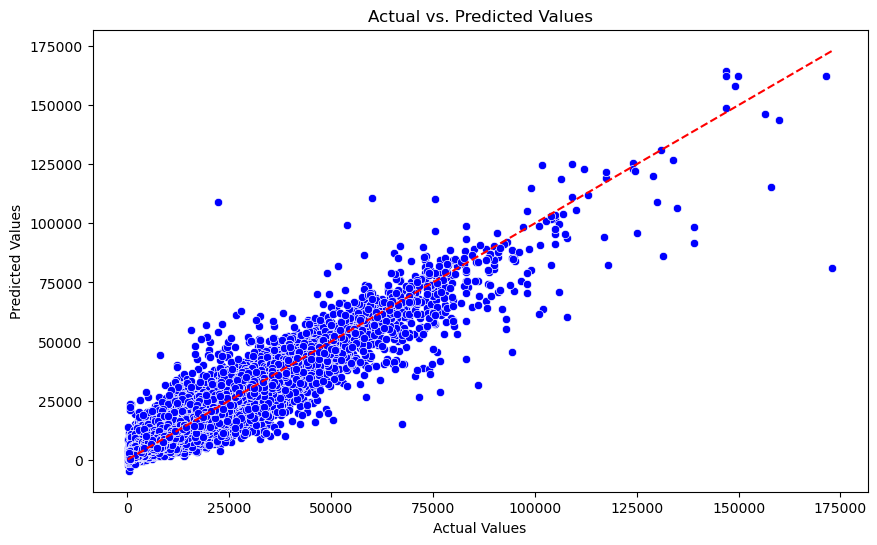

In [12]:
plt.figure(figsize=(10, 6))
y_pred = xgb.predict(X_test)

# Plotting actual values against predicted values
sns.scatterplot(x=y_test['sellingprice'], y=y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Adding diagonal line
sns.lineplot(x=[min(y_test['sellingprice']), max(y_test['sellingprice'])], 
             y=[min(y_test['sellingprice']), max(y_test['sellingprice'])], 
             color='red', linestyle='--')

The slope of the points from the diagonal line can provide insight into how well the model predicts values. If the points are along the diagonal line, the model predicts perfectly. If the points tend to fall below the diagonal line, then the model tends to produce lower predictions. Conversely, if the points tend to be above the diagonal line, then the model tends to produce predictions that are too high.

The plot shows that the model's predictions are quite close to the diagonal line, indicating good accuracy. While some discrepancies exist (seen as points deviating from the line), they are minor compared to the overall accuracy. This convergence toward the diagonal line is a positive sign, indicating the model's strong predictive power. However, it's important to recognize that, like any model, there are still occasional imprecise predictions, often in complex data patterns.

## Feature Importances

This process is conducted to understand the impact of features on the prediction outcomes. It helps in identifying which features play a significant role in influencing the predictions made by the model.

In [13]:
feature_importance = xgb.feature_importances_

import pandas as pd
df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

print(df_feature_importance)

                  Feature  Importance
6           model_encoded    0.205099
1                odometer    0.138129
22    body_type_supercrew    0.122264
19       body_type_g-type    0.110284
20    body_type_hatchback    0.067255
16          body_type_cab    0.054283
23          body_type_suv    0.043721
24          body_type_van    0.038985
8            make_encoded    0.030245
10          region_canada    0.027923
9            trim_encoded    0.025135
17  body_type_convertible    0.023945
0               condition    0.020080
21        body_type_sedan    0.019933
18        body_type_coupe    0.019235
7          seller_encoded    0.011257
15            region_west    0.006843
3                 is_auto    0.006072
25        body_type_wagon    0.005988
13          region_others    0.005974
4         ext_color_group    0.004400
11         region_midwest    0.003563
2              month_sold    0.002790
14           region_south    0.002769
12       region_northeast    0.002617
5         in

From the data above, the summary of influence of features on prediction results is as follows:

**Most Important Features:**
- `model_encoded` (0.205099): This feature has the most significant level of influence on the prediction results. This means that the type of vehicle model being encoded has a very strong influence on the prediction results. Model_encoded is the most important feature.
- `odometer` (0.138129): The odometer also has a significant influence on the prediction results, although not as strong as model_encoded.

**Medium Impact Features:**
- `body_type_supercrew` (0.122264): The "supercrew" body type is one that has a moderate influence on the prediction results.
- `body_type_g-type` (0.110284): The body type "g-type" also has a fairly strong influence on the prediction results.

**Minor Impact Features:**</br>
Apart from the features mentioned above, the rest have relatively less influence on the prediction results. Some of them even have a very small influence (the feature importance value is close to 0), such as `int_color_group`, `month_sold`, `region_northeast`, and others. These features may not contribute significantly to making more accurate predictions.

# Summary: Enhancing Used Car Price Prediction Model

The objective of this project is to create a machine learning model for predicting the prices of used cars. This model aims to provide valuable insights and offers an accurate estimate of the true value of a used car. The analysis focuses on several key features, including the vehicle model, odometer reading, and body type, among others.

### Key Insights and Recommendations:

**Model Influence:**</br>
The most influential feature in predicting used car prices is `model_encoded`. It plays a crucial role in determining the value of a vehicle. Enhancing the encoding technique for the vehicle model could lead to more accurate predictions.

**Odometer Reading:**</br>
The `odometer` feature holds significant sway over the prediction results. Regularly updating and monitoring odometer data is crucial for accurate price estimations.


**Body Types Impact:**</br>
The `body_types` "supercrew" and "g-type" have notable impacts on prediction results. Consider tailoring marketing strategies or incentives specifically for these body types to optimize sales.


**Minor Impact Features:**</br>
Some features, such as `int_color_group` and `month_sold`, have relatively less influence on predictions. Allocating resources efficiently and focusing on features with greater impact can streamline efforts.

**Continuous Evaluation:**</br>
Market conditions and preferences evolve over time. Regularly monitoring the significance of each feature is crucial for adapting strategies in line with changing dynamics.

### Recommendations for Business Strategy

1. Prioritize Model Encoding: Enhance the encoding technique for vehicle models to improve prediction accuracy and capture nuances in pricing.
2. Mileage Consideration: Continuously update and monitor odometer readings to factor in the impact of mileage on used car prices.
3. Tailored Marketing for Body Types: Implement targeted marketing strategies or incentives for body types "supercrew" and "g-type" to optimize sales.
4. Focus Resources Efficiently: Allocate resources based on feature importance to maximize efforts and improve the overall accuracy of predictions.

By implementing these recommendations, the effectiveness of car price prediction model can be refined and enhanced to providing accurate estimates for buyers and sellers in the used car market. This will ultimately lead to more informed decisions and greater confidence in transactions involving used cars.